In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nisaww","key":"09c0fa568aeb6f821c0f638bdf12a11b"}'}

In [ ]:
!ls

drive  kaggle.json  sample_data


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d techsash/waste-classification-data

Dataset URL: https://www.kaggle.com/datasets/techsash/waste-classification-data
License(s): CC-BY-SA-4.0
100% 427M/427M [00:20<00:00, 23.9MB/s]
100% 427M/427M [00:20<00:00, 22.4MB/s]


In [ ]:
#ekstarck file zip
import zipfile
zip_ref = zipfile.ZipFile('/content/waste-classification-data.zip', 'r')
zip_ref.extractall('/content/drive/MyDrive/MSIB TIA/Waste/Dataset1')
zip_ref.close()


Pemrosesan Data


In [ ]:
import os
import random
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
#Path folder yang ingin diakses
folder_path = '/content/drive/MyDrive/MSIB TIA/Waste/Dataset1'
# Count the number of files in the dataset directory
total_files = sum([len(files) for r, d, files in os.walk(folder_path)])

print(f"Jumlah total Keseluruhan dataset: {total_files}")

Jumlah total Keseluruhan dataset: 50154


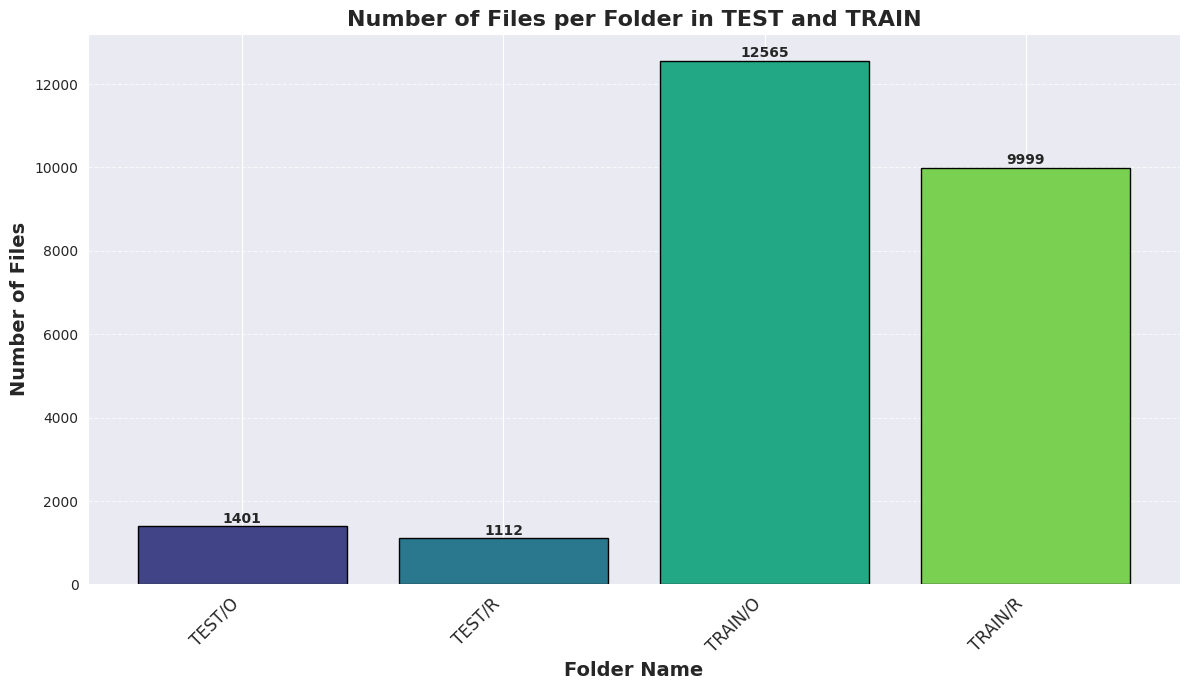

In [ ]:
import matplotlib.pyplot as plt
import os
import numpy as np
from matplotlib import cm
import seaborn as sns

# Path folder yang ingin diakses
folder_path = '/content/drive/MyDrive/MSIB TIA/Waste/Dataset1/DATASET'

# Periksa apakah folder_path ada
if not os.path.exists(folder_path):
    raise FileNotFoundError(f"Path '{folder_path}' tidak ditemukan. Pastikan path benar.")

# Inisialisasi dictionary untuk menyimpan jumlah file per kategori
folder_counts = {}

# Loop melalui setiap kategori (TEST dan TRAIN)
for category in ['TEST', 'TRAIN']:
    category_path = os.path.join(folder_path, category)
    if os.path.isdir(category_path):
        # Loop ke setiap subfolder dalam kategori
        for subfolder_name in os.listdir(category_path):
            subfolder_path = os.path.join(category_path, subfolder_name)
            if os.path.isdir(subfolder_path):
                # Hitung jumlah file dalam subfolder (abaikan file tersembunyi)
                file_count = len([f for f in os.listdir(subfolder_path) if not f.startswith('.')])
                folder_counts[f"{category}/{subfolder_name}"] = file_count

# Pastikan ada data untuk divisualisasikan
if not folder_counts:
    raise ValueError(f"Tidak ada folder dengan file di dalam path '{folder_path}'.")

# Buat visualisasi bar chart
folders = list(folder_counts.keys())
counts = list(folder_counts.values())

# Set style untuk grafik
sns.set_style("darkgrid")

# Membuat warna gradien untuk bar
colors = cm.viridis(np.linspace(0.2, 0.8, len(folders)))

plt.figure(figsize=(12, 7))  # Ukuran lebih besar untuk visibilitas
bars = plt.bar(folders, counts, color=colors, edgecolor='black')

# Menambahkan label jumlah data di atas setiap bar
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,  # Posisi teks
             str(count), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Tambahkan label dan judul dengan font yang lebih besar
plt.xlabel("Folder Name", fontsize=14, fontweight='bold')
plt.ylabel("Number of Files", fontsize=14, fontweight='bold')
plt.title("Number of Files per Folder in TEST and TRAIN", fontsize=16, fontweight='bold')

# Memutar label x-axis untuk visibilitas lebih baik
plt.xticks(rotation=45, ha="right", fontsize=12)

# Tambahkan grid untuk memudahkan pembacaan
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan keterangan
plt.tight_layout()  # Menghindari overlap
plt.show()


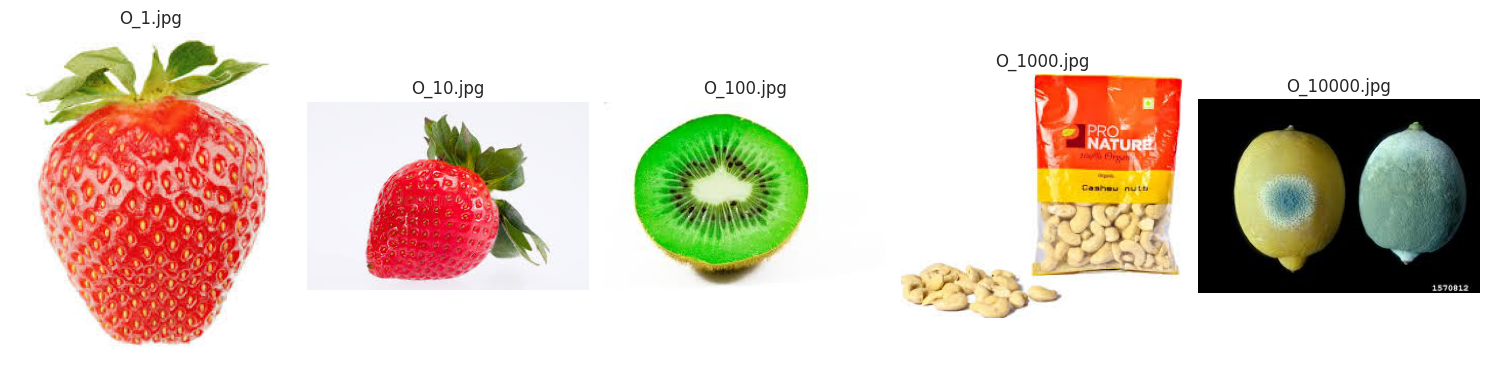

In [ ]:
# prompt: melihat contoh gambar dalam data O

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Path ke folder yang berisi gambar
folder_path = '/content/drive/MyDrive/MSIB TIA/Waste/Dataset1/DATASET/TRAIN/O'

# Menampilkan beberapa gambar (misalnya, 5 gambar)
num_images_to_show = 5
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))][:num_images_to_show]


plt.figure(figsize=(15, 5))  # Mengatur ukuran figure

for i, image_file in enumerate(image_files):
  image_path = os.path.join(folder_path, image_file)
  img = mpimg.imread(image_path)

  plt.subplot(1, num_images_to_show, i+1) # membuat subplot
  plt.imshow(img)
  plt.axis('off') # menghilangkan axis
  plt.title(image_file) # menampilkan nama file sebagai title


plt.tight_layout()
plt.show()

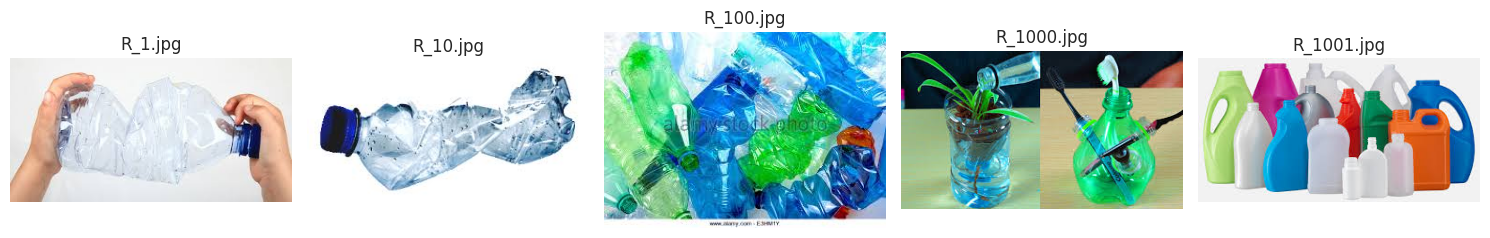

In [ ]:
# prompt: melihat contoh gambar dalam data R

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Path ke folder yang berisi gambar
folder_path = '/content/drive/MyDrive/MSIB TIA/Waste/Dataset1/DATASET/TRAIN/R'

# Menampilkan beberapa gambar (misalnya, 5 gambar)
num_images_to_show = 5
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))][:num_images_to_show]


plt.figure(figsize=(15, 5))  # Mengatur ukuran figure

for i, image_file in enumerate(image_files):
  image_path = os.path.join(folder_path, image_file)
  img = mpimg.imread(image_path)

  plt.subplot(1, num_images_to_show, i+1) # membuat subplot
  plt.imshow(img)
  plt.axis('off') # menghilangkan axis
  plt.title(image_file) # menampilkan nama file sebagai title


plt.tight_layout()
plt.show()

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


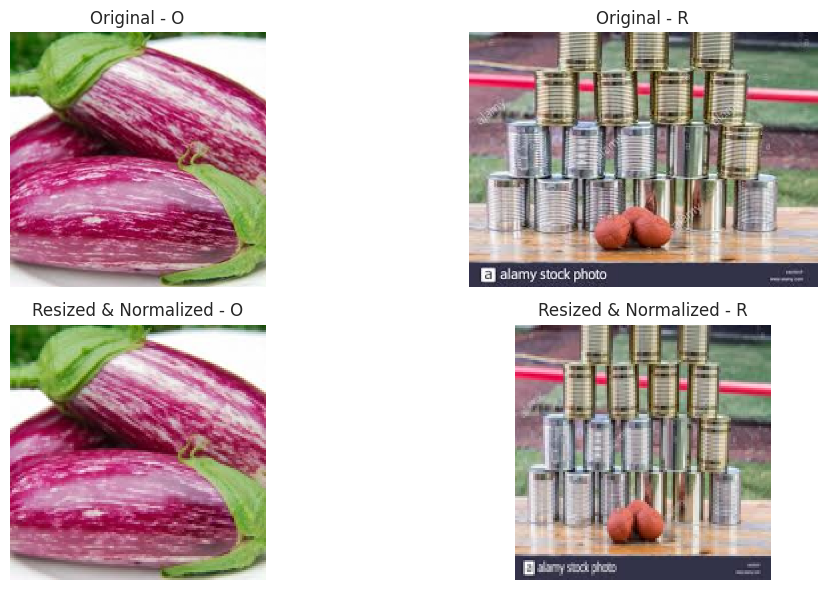

In [ ]:
# Import library yang diperlukan
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import random
from tensorflow.keras.preprocessing import image

# Jalur (path) untuk dataset gambar
train_path = '/content/drive/MyDrive/MSIB TIA/Waste/Dataset1/DATASET/TRAIN'  # Path untuk data pelatihan
test_path = '/content/drive/MyDrive/MSIB TIA/Waste/Dataset1/DATASET/TEST'    # Path untuk data pengujian

# Tentukan ukuran gambar dan ukuran batch
IMG_SIZE = (128, 128)  # Ukuran gambar setelah diubah (128x128 piksel)
BATCH_SIZE = 32        # Ukuran batch untuk generator

# Buat data generator untuk normalisasi gambar (tanpa augmentasi)
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)  # Normalisasi pixel (0-1)

# Generator data untuk data pelatihan (tanpa augmentasi)
train_generator = train_datagen.flow_from_directory(
    train_path,                 # Path data pelatihan
    target_size=IMG_SIZE,       # Ukuran gambar setelah diubah
    batch_size=BATCH_SIZE,      # Ukuran batch
    class_mode='categorical'    # Klasifikasi kategori
)

# Generator data untuk data pengujian (tanpa augmentasi)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)  # Normalisasi pixel (0-1)
test_generator = test_datagen.flow_from_directory(
    test_path,                  # Path data pengujian
    target_size=IMG_SIZE,       # Ukuran gambar setelah diubah
    batch_size=BATCH_SIZE,      # Ukuran batch
    class_mode='categorical',   # Klasifikasi kategori
    shuffle=False               # Data tidak diacak untuk evaluasi
)

# Fungsi untuk menampilkan perbandingan gambar asli dan gambar yang sudah diproses
def show_images_comparison(image_paths, subfolder_names, target_size=IMG_SIZE):
    # Membuat subplot dengan jumlah kolom sesuai jumlah subfolder
    num_subfolders = len(image_paths)
    fig, axes = plt.subplots(2, num_subfolders, figsize=(12, 6))

    # Loop untuk setiap subfolder dan path gambar
    for i, (image_path, subfolder_name) in enumerate(zip(image_paths, subfolder_names)):
        # Memuat dan memproses gambar asli
        img = image.load_img(image_path)                      # Memuat gambar asli
        original_img = image.img_to_array(img) / 255.0        # Normalisasi gambar asli

        # Mengubah ukuran dan normalisasi gambar
        img_resized = img.resize(target_size)                 # Mengubah ukuran gambar
        resized_img = image.img_to_array(img_resized) / 255.0 # Normalisasi gambar yang diubah ukurannya

        # Menampilkan gambar asli di baris pertama
        axes[0, i].imshow(original_img)                       # Menampilkan gambar asli
        axes[0, i].set_title(f"Original - {subfolder_name}")  # Judul gambar asli
        axes[0, i].axis('off')                                # Menghilangkan sumbu

        # Menampilkan gambar yang sudah diubah ukuran dan dinormalisasi di baris kedua
        axes[1, i].imshow(resized_img)                        # Menampilkan gambar yang diproses
        axes[1, i].set_title(f"Resized & Normalized - {subfolder_name}")  # Judul gambar yang diproses
        axes[1, i].axis('off')                                # Menghilangkan sumbu

    # Menyusun tata letak subplot
    plt.tight_layout()
    plt.show()

# Daftar semua subdirektori (kelas) di folder train_path
subfolders = [f for f in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, f))]

# Siapkan daftar untuk path gambar dan nama subfolder
image_paths = []
subfolder_names = []

# Loop untuk setiap subfolder (kelas)
for subfolder in subfolders:
    # Daftar semua file gambar di subfolder saat ini
    image_files = [f for f in os.listdir(os.path.join(train_path, subfolder)) if f.lower().endswith(('png', 'jpg', 'jpeg'))]

    # Lewati folder kosong
    if not image_files:
        print(f"Peringatan: Tidak ada gambar ditemukan di {subfolder}")
        continue

    # Pilih satu gambar secara acak dari subfolder
    random_image_filename = random.choice(image_files)

    # Dapatkan path lengkap ke gambar yang dipilih
    sample_image_path = os.path.join(train_path, subfolder, random_image_filename)

    # Tambahkan path gambar dan nama subfolder ke daftar
    image_paths.append(sample_image_path)
    subfolder_names.append(subfolder)

# Tampilkan perbandingan untuk semua subfolder
if image_paths:
    show_images_comparison(image_paths, subfolder_names)  # Panggil fungsi untuk menampilkan gambar
else:
    print("Tidak ada gambar ditemukan di subfolder mana pun.")

model tarining CNN

In [ ]:
import tensorflow as tf

# Definisikan model CNN
model_cnn = tf.keras.models.Sequential([
    # Lapisan Input: Menerima gambar dengan ukuran 224x224x3 (3 saluran untuk RGB)
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),  # Lapisan konvolusi dengan 32 filter ukuran 3x3 dan aktivasi ReLU
    tf.keras.layers.MaxPooling2D(2, 2),  # Lapisan pooling dengan ukuran 2x2 untuk mengurangi dimensi

    # Lapisan konvolusi dan pooling kedua
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),  # Lapisan konvolusi dengan 64 filter ukuran 3x3
    tf.keras.layers.MaxPooling2D(2, 2),  # Lapisan pooling dengan ukuran 2x2

    # Lapisan konvolusi dan pooling ketiga
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),  # Lapisan konvolusi dengan 128 filter ukuran 3x3
    tf.keras.layers.MaxPooling2D(2, 2),  # Lapisan pooling dengan ukuran 2x2

    # Global Average Pooling untuk mengurangi dimensi
    tf.keras.layers.GlobalAveragePooling2D(),  # Merata-ratakan nilai fitur untuk menghasilkan vektor berdimensi kecil

    # Lapisan Dense (Fully Connected) untuk klasifikasi
    tf.keras.layers.Dense(256, activation='relu'),  # Lapisan Dense dengan 256 neuron dan aktivasi ReLU
    tf.keras.layers.Dense(128, activation='relu'),  # Lapisan Dense dengan 128 neuron dan aktivasi ReLU
    tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')  # Lapisan output dengan jumlah neuron sesuai jumlah kelas dan aktivasi softmax
])

# Kompilasi model
model_cnn.compile(
    optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001),  # Optimizer Adamax dengan learning rate 0.001
    loss='categorical_crossentropy',  # Fungsi loss untuk klasifikasi kategori
    metrics=['accuracy']  # Metrik evaluasi akurasi
)

# Tampilkan ringkasan model
model_cnn.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 159,426 (622.76 KB)

 Trainable params: 159,426 (622.76 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf  # Tambahkan ini di awal kode

# Definisi early stopping tanpa validasi
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='loss',  # Memantau nilai loss pada data pelatihan
    patience=3,      # Jumlah epoch tanpa perbaikan setelah itu pelatihan akan dihentikan
    restore_best_weights=True  # Mengembalikan bobot model dari epoch dengan nilai terbaik dari metrik yang dipantau
)

# Train the model tanpa validasi
history_cnn = model_cnn.fit(
    train_generator,
    epochs=10,  # Sesuaikan jumlah epoch sesuai kebutuhan
    shuffle=False,
    callbacks=[early_stopping]
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


706/706 ━━━━━━━━━━━━━━━━━━━━ 104s 138ms/step - accuracy: 0.7572 - loss: 0.4966
Epoch 2/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 135s 135ms/step - accuracy: 0.8271 - loss: 0.3977
Epoch 3/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 140s 133ms/step - accuracy: 0.8465 - loss: 0.3648
Epoch 4/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 94s 132ms/step - accuracy: 0.8568 - loss: 0.3447
Epoch 5/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 95s 135ms/step - accuracy: 0.8630 - loss: 0.3340
Epoch 6/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 95s 135ms/step - accuracy: 0.8687 - loss: 0.3242
Epoch 7/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 141s 135ms/step - accuracy: 0.8735 - loss: 0.3089
Epoch 8/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 95s 135ms/step - accuracy: 0.8776 - loss: 0.2965
Epoch 9/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 94s 133ms/step - accuracy: 0.8855 - loss: 0.2850
Epoch 10/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 95s 134ms/step - accuracy: 0.8823 - loss: 0.2883


In [ ]:
# Evaluate model
loss, accuracy = model_cnn.evaluate(test_generator)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

79/79 ━━━━━━━━━━━━━━━━━━━━ 12s 133ms/step - accuracy: 0.8650 - loss: 0.3002
Test Loss: 0.2654
Test Accuracy: 0.8894


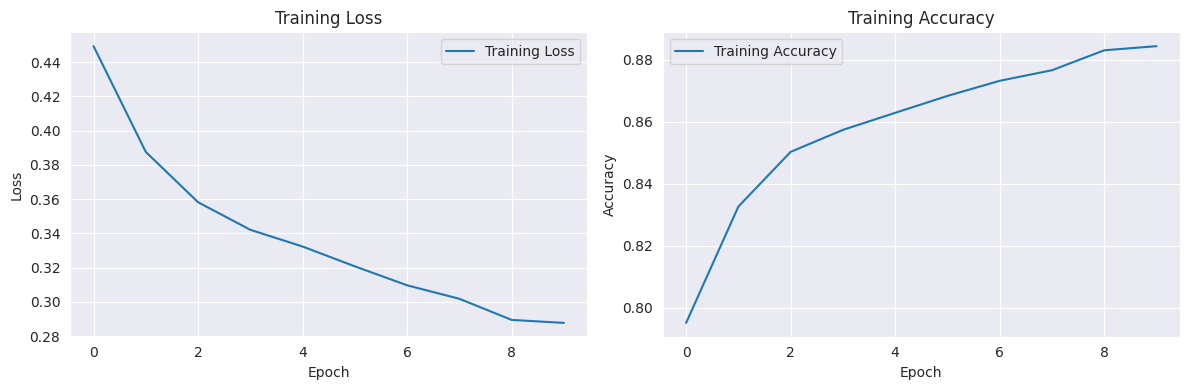

In [ ]:
# evaluasi model train acurasi dan los

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 128ms/step
              precision    recall  f1-score   support

           O       0.95      0.85      0.90      1401
           R       0.83      0.94      0.88      1112

    accuracy                           0.89      2513
   macro avg       0.89      0.89      0.89      2513
weighted avg       0.90      0.89      0.89      2513



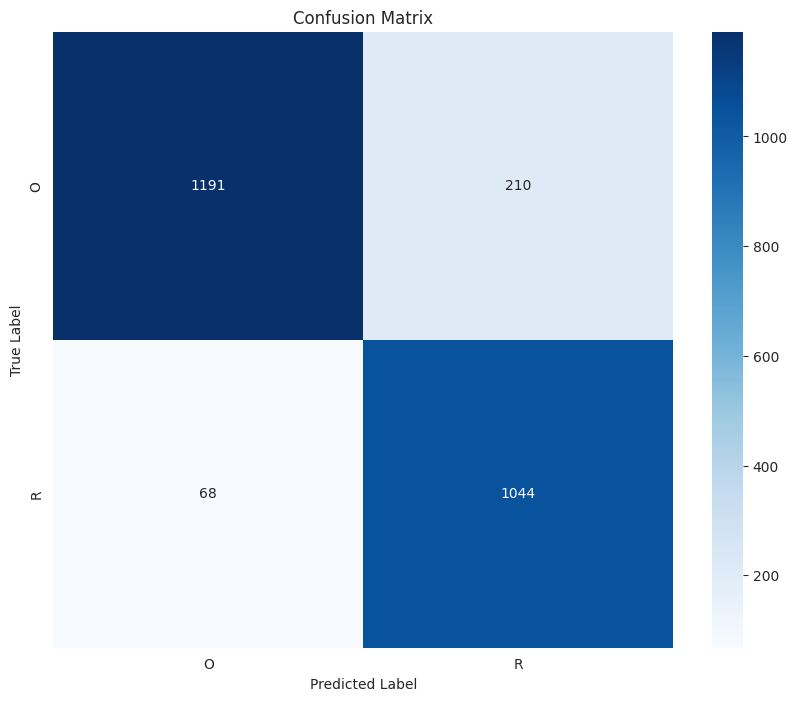

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Menghasilkan prediksi pada data pengujian
y_pred = model_cnn.predict(test_generator)  # Menggunakan model CNN untuk memprediksi data pengujian
y_pred_classes = np.argmax(y_pred, axis=1)  # Mengambil kelas dengan probabilitas tertinggi dari hasil prediksi
y_true = test_generator.classes  # Label sebenarnya dari data pengujian

# Menampilkan laporan klasifikasi
print(classification_report(y_true, y_pred_classes, target_names=list(test_generator.class_indices.keys())))
# Laporan klasifikasi mencakup metrik seperti presisi, recall, F1-score, dan akurasi untuk setiap kelas

# Menghitung confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)  # Matriks yang menunjukkan jumlah prediksi benar dan salah untuk setiap kelas

# Membuat plot confusion matrix menggunakan heatmap dari seaborn
plt.figure(figsize=(10, 8))  # Mengatur ukuran plot
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(test_generator.class_indices.keys()),  # Label pada sumbu x sesuai dengan nama kelas
            yticklabels=list(test_generator.class_indices.keys()))  # Label pada sumbu y sesuai dengan nama kelas
plt.xlabel('Label Prediksi')  # Label sumbu x
plt.ylabel('Label Sebenarnya')  # Label sumbu y
plt.title('Confusion Matrix')  # Judul plot
plt.show()  # Menampilkan plot


In [ ]:
# Save Model CNN
model_cnn.save('/content/drive/MyDrive/MSIB TIA/Waste/save_model/cnn_model1.h5')
print("Model CNN disimpan sebagai 'cnn_model1.h5'.")

Model CNN disimpan sebagai 'cnn_model1.h5'.
